#Quiz 3: Efficient GMM

####Question 1

Suppose your GMM is exactly identified. That is, there are the same number of moments (size of $g_T$) as the number of parameters. Furthermore, the parameters matter to the moments, i.e. $d=dg(b)/db′$ is a full rank square matrix, and the moments aren't repeated, $var(g_T)=S$ is nonsingular. (I.e., this is not a trick question.) What is the efficient choice of the a matrix in this situation?

>**Answer: $a=d′S−1$. Full rank d means that $a=d′$ will give the same efficient result**

####Question 2

Consider the CAPM estimation again. Our model is
$$g(a,b) = \left[ \begin{array}{c} E(mR^{em}) \\ E(mR^f-1) \\ E(mR^{e1}) \\ E(mR^{e2}) \\  \end{array} \right]$$

with

$$m=α−\beta R^{em}$$

to examine the CAPM. (we usually use a,b, but there are too many as and bs' floating around. $R^{ei}$ refers to different securities, not raising to the power i.) We talked about using different $a$ matrices in $ag_T(b)=0$ to estimate $\alpha, \beta$. What happens if instead we use the minimization approach to GMM and form

$$min_{b=[\alpha \ \beta]'} g_T(b)'Wg_T(b)$$

What a matrix in $ag_T(b)=0$ is equivalent to this minimization? 

>**Answer: $a=d'W$**

####Question 3

Now, suppose as in previous examples you want to use the first two moments for estimation and the remaining moments for model evaluation (alphas). Again, our model is

$$g(a,b) = \left[ \begin{array}{c} E(mR^{em}) \\ E(mR^f-1) \\ E(mR^{e1}) \\ E(mR^{e2}) \\  \end{array} \right]$$

with

$$m=α−\beta R^{em}$$

Previously, we used

$$\begin{equation} a = \left[ \begin{array}{ c c c c } 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ \end{array} \right] \ \ \ \  (1)
\end{equation}$$

to this end. What happens if instead we use the minimization approach to GMM and form

$$min_{b=\{\alpha, \ \beta\}} g_T(b)'Wg_T(b) \ \ \ \ \  (2)$$

using

$$W = \left[ \begin{array} {c c c c } 1 & 0 & 0 & 0  \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 \\ \end{array} \right]$$

in order to force the minimization to focus only on the first two moments?

Again, this is not a trick question. Assume that $\partial g(b) / \partial b$ are nonzero, and full rank where appropriate. 

>**Answer: In this case, though the resulting a matrix is different, the fixed a approach (1) and minimization approach (2) give the same estimates. **

####Question 4

Consider again the example of measuring the equity premium $E(R^e)$ from data from two countries. Again, suppose you believe the two mean returns are the same $μ$ so the moments are

$$g_T(\mu)=E_T \left[ \begin{array}{c} R^{eA}-\mu \\ R^{eB}-\mu \end{array} \right]$$

Suppose the returns are independent over time, have the same variance, and correlation $|\rho|<1$ so the covariance matrix of returns is

$$\Sigma = \left[ \begin{array}{cc} 1 &\rho \\ \rho & 1 \end{array} \right] \times \sigma^2$$

What is the efficient GMM estimator of $\mu$? 

>**Answer: $\frac{1}{2}[E_T(R^{eA})+E_T(R^{eB})]$**

####Question 5

Now, suppose the two countries have different return variances $σ^2_A$ and $σ^2_B$ with $σ^2_B=4×σ^2_A$. Suppose the returns are uncorrelated $\rho=0$. What is the efficient GMM estimator in this case? Give the weights on the mean of country A and the mean of country B, accurate to two decimals, separated by a space, i.e. enter $w_A$ and $w_B$ in 

$$\hat{\mu} = w_A E_T(R^{eA}) + 
w_B E_T(R^{eB})$$

>**Answer: the formula of great beauty and utility is:**

$$\frac{\frac{1}{\sigma_A^2}}{\left[ \frac{1}{\sigma_A^2} + \frac{1}{\sigma_B^2}\right]}E_T(R^{eA}) + 
\frac{\frac{1}{\sigma_B^2}}{\left[ \frac{1}{\sigma_A^2} + \frac{1}{\sigma_B^2}\right]}E_T(R^{eB})= \mu$$ 

In [1]:
var_A = 1
var_B = 4

print('{:.2f} {:.2f}'.format((1/var_A)/(1/var_A+1/var_B),(1/var_B)/(1/var_A+1/var_B)))

0.80 0.20


####Question 6

Now suppose $\rho \neq 0 $, $\sigma_A=\sigma_B=\sigma=1$, but suppose your model predicts that smaller countries have higher equity premiums. A having half the population of B, your model predicts

$$g_T(\mu)=E_T \left[ \begin{array}{c} R^{eA}-\mu \\ R^{eB}-\mu \end{array} \right]$$

Find the efficient GMM estimator in this case. Take the limit $\rho \rightarrow 1$ (Note, first find the estimator, then take the limit.) Again, enter the weights $w_A$, $w_B$ in

$$\hat{\mu} = w_A E_T(R^{eA}) + 
w_B E_T(R^{eB})$$

>**Answer:**
$$d=dg_T(\mu)/d\mu = \left[ \begin{array}{c} -2 \\ -1 \end{array} \right] \\
S = \Sigma = \sigma^2  \left[ \begin{array}{c c} 1& \rho   \\ \rho   & 1\end{array} \right] \\
d'S^{-1} = -\frac{1}{(1-\rho^2)\sigma^{2}} [2 \ \ 1] \left[  \begin{array}{c c} 1 & -\rho \\ -\rho & 1 \end{array} \right] \\
d'S^{-1}g_T(\mu)  =0: (2-\rho)E_T(R^{eA}-2\mu) +(1-2\rho)E_T(R^{eB}-\mu)=0 \\
(2-\rho)E_T(R^{eA}) +(1-2\rho)E_T(R^{eB})=(5-4\rho) \mu \\
\frac{(2-\rho)}{(5-4\rho)}E_T(R^{eA}) +\frac{(1-2\rho)}{(5-4\rho)}E_T(R^{eB})= \mu$$

In [2]:
rho = 1
print('{:} {:}'.format((2-rho)/(5-4*rho), (1-2*rho)/(5-4*rho)))

1.0 -1.0


#Homework: GMM Part I

####Question 1

We are going to do GMM of the consumption-based model,

$$E\left[\left(\frac{c_{t+1}}{c_t}\right)^{-\gamma}R^e_{t+1}\right]=0$$

using these portfolios. We're going to build up to it so you can understand how things are working.

Find the mean and correlation matrix of consumption growth and the three excess returns. Enter the correlation between consumption growth and rmrf, smb, hml as three numbers separated by a space.

For you to ponder: Is consumption growth positively correlated with the returns? Which ones have greater correlation with consumption growth?


In [1]:
import pandas as pd

gmm_data = pd.read_csv('https://d396qusza40orc.cloudfront.net/assetpricing/data/ \
                       coursera_gmm_data.txt', sep='\s+', skiprows=2, 
                       names=['dc', 'rmrf', 'smb', 'hml', 'rf'], index_col=0, 
                       parse_dates=True)

#Find correlation values and display full correlation matrix
corr_mat = gmm_data.corr()
print('{:.4f} {:.4f} {:.4f}'.format(*corr_mat.ix[0,1:4]))
gmm_data.describe()

0.3012 0.0570 0.2729


,dc,rmrf,smb,hml,rf
count,63.000000,63.000000,63.000000,63.000000,63.000000
mean,1.022611,0.078687,0.026444,0.049111,0.045181
std,0.014706,0.183304,0.129718,0.129510,0.030802
min,0.988846,-0.383400,-0.249100,-0.339600,0.000200
25%,1.015823,-0.039900,-0.064200,-0.031750,0.022950
50%,1.022914,0.106600,0.002500,0.051900,0.043900
75%,1.031039,0.205250,0.087350,0.133800,0.060250
max,1.057154,0.493500,0.510900,0.393900,0.147100


####Question 2

Still building up to GMM, make a plot of the moment condition

$$E\left[\left(\frac{c_{t+1}}{c_t}\right)^{-\gamma}R^e_{t+1}\right]=0$$

as a function of $\gamma$ for each of $R^e= rmrf, smb, hml$. Why? Recall that GMM wants to choose $\gamma$ to set the moments to zero. If we use one asset at a time, the $\gamma$ which sets that asset's moment to zero is the estimate. So let's look at the $E(m(\gamma)R^e)$ as a function of $\gamma$ for each asset in turn. Later, when we use multiple assets, the $a$ matrix will choose a portfolio, a linear combination of our three asset returns, and set its sample $E(mR^e)$ to zero. Knowing how the individual assets' moments behave will help to interpret those results.

To verify that your graph is working, enter a rough value for the GMM estimate of $\gamma$ resulting from each of rmrf, smb, and hml in turn, as three numbers separated by spaces. You can eyeball these from the graph, as the answers accept a fairly wide range. Report -99 if an estimate is not calculable.


78.3004 -99 99.5617


/usr/local/lib/python3.4/dist-packages/matplotlib-1.5.x-py3.4-linux-x86_64.egg/matplotlib/font_manager.py:1279: UserWarning: findfont: Font family ['monospace'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


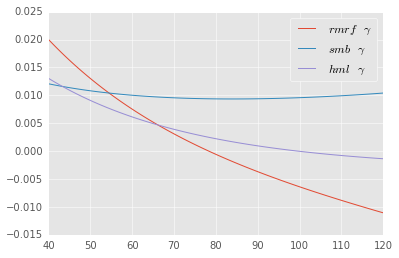

In [4]:
%matplotlib inline
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def mom_consumption(gamma, dc, instr):
    return (instr * dc**-gamma).mean(0)
           

gamma_rmrf = opt.brentq(mom_consumption, 40, 150, args=(gmm_data.dc, gmm_data.rmrf), rtol=1e-12)
#gamma_smb = opt.brentq(mom_consumption, 40, 150, args=(gmm_data.dc, gmm_data.smb), rtol=1e-12)
gamma_hml = opt.brentq(mom_consumption, 40, 150, args=(gmm_data.dc, gmm_data.hml), rtol=1e-12)


interval = np.linspace(40,120, num=400)
plt.plot(interval, [mom_consumption(i, gmm_data.dc, gmm_data.rmrf) for i in interval], 
         label = '$\gamma_rmrf$')
plt.plot(interval, [mom_consumption(i, gmm_data.dc, gmm_data.smb) for i in interval], 
         label = '$\gamma_smb$')
plt.plot(interval, [mom_consumption(i, gmm_data.dc, gmm_data.hml) for i in interval], 
         label = '$\gamma_hml$')
plt.legend(loc='best');

print('{:.4f} {:} {:.4f}'.format(gamma_rmrf, -99, gamma_hml))

####Question 3

Now we will perform a first-stage and second-stage GMM estimate of $\gamma$, using rmrf and hml (Omit smb.) The homework will guide you through these calculations. The directions are a bit chatty, so this really is not as hard as it looks.

Start by finding the first stage GMM estimate.

$$min_{\gamma} g_T(\gamma)'Wg_T(\gamma)$$

with $W=I$,

$$g_T(\gamma)=E\left[\left(\frac{c_{t+1}}{c_t}\right)^{-\gamma}R^e_{t+1}\right]$$


and using $R^e=[rmrf \; hml]′$.

Report your $\hat\gamma$ accurate to one decimal. 

80.95


/usr/local/lib/python3.4/dist-packages/matplotlib-1.5.x-py3.4-linux-x86_64.egg/matplotlib/font_manager.py:1279: UserWarning: findfont: Font family ['monospace'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


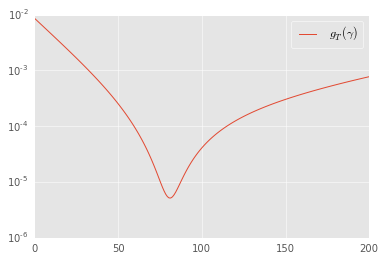

In [5]:
def g_t(gamma):
    return (np.c_[gmm_data.rmrf * gmm_data.dc**-gamma,
                  gmm_data.hml  * gmm_data.dc**-gamma]).mean(0)

def obj_fun(gamma):
    return g_t(gamma).dot(np.eye(2)).dot(g_t(gamma))


gamma = opt.minimize(obj_fun, 80, tol=1e-8)
print ('{:.2f}'.format(*gamma.x))

interval = np.linspace(0,200, num=200)
plt.plot(interval, [obj_fun(i) for i in interval], label = '$g_T(\gamma)$')
plt.yscale('log')
plt.legend(loc='best');

####Question 4

Next, we're going to compute the standard error of $\hat \gamma$. This requires several steps.

First, compute

$$d = \frac{d g_T(\gamma)}{d \gamma}$$

Be careful.

$$\frac{ d}{d \gamma}  \left( \frac{c_{t+1}}{c_t} \right)^{-\gamma} \neq -\gamma
\left(\frac{c_{t+1}}{c_t}\right)^{-\gamma-1}!$$

The correct $d$ matrix is

$$d=\frac{\partial }{\partial \gamma }E\left[ \left( \frac{c_{t+1}}{c_{t}}%
\right) ^{-\gamma }R_{t+1}^{e}\right] =\frac{\partial }{\partial \gamma }E%
\left[ e^{-\gamma \log (c_{t+1}/c_{t})}R_{t+1}^{e}\right] \\
=-E\left[ \log \left( \frac{c_{t+1}}{c_{t}}\right) e^{-\gamma \log
(c_{t+1}/c_{t})}R_{t+1}^{e}\right] 
=-E \left[ \log
\left( \frac{c_{t+1}}{c_{t}}\right) 
\left( \frac {c_{t+1}}{c_{t}} \right) ^{-\gamma} R_{t+1}^{e} \right]$$

Next, compute $a=d′W$. (Recall the first order condition for the minimization is $d′Wg_T(\hat \gamma)=0$.)

Look at your $a=d′W$ matrix. Is GMM paying equal attention to weighting one return vs. another one? Why? 

In [6]:
d = -np.c_[gmm_data.rmrf * np.log(gmm_data.dc) * (gmm_data.dc**-gamma.x), 
           gmm_data.hml  * np.log(gmm_data.dc) * (gmm_data.dc**-gamma.x)].mean(axis = 0)

a = d.dot(np.eye(2))

print ('{:.8f} {:.8f}'.format(*d))

-0.00033037 -0.00014241


>**Answer: GMM pays more attention to rmrf, because it has a larger element of the d matrix, its moment is more sensitive to $\gamma$. ** 

####Question 5

Next, compute the $S$ matrix. For the purposes of a homework, we can exploit the null that $E_t(m_{t+1}R^e_{t+1})=0$ to ignore all the lead and lag terms of $S$. It's also a good idea to remove the sample mean of $m_{t+1}R^e_{t+1}$, so you are just calculating the covariance matrix of $u_t=f(x_t,b)=m_{t+1}R^e_{t+1}$. (Under the null the mean is zero, so covariance and second moment are the same asymptotically.)

Finally, program up the standard error formula,

$$var(\hat\gamma)=\frac{1}{T}(ad)^{−1}aSa′(ad)^{−1}′$$

Report the standard error (not variance) of your $\gamma$ estimate. 

In [7]:
# Calculate m,x and the m*x series
gmm_data['m'] = pd.Series(gmm_data.dc**-gamma.x)
mx = gmm_data[['rmrf', 'hml']].multiply(gmm_data.m, axis=0)

# Compute the second moment matrix
S = mx.cov()

# Calculate the variance and standard error
ad_inv = 1/a.dot(d)
var = np.dot(ad_inv,a).dot(S).dot(a[:,np.newaxis]).dot(ad_inv) / gmm_data.shape[0]
se = np.sqrt(var)

print('{:.4f}'.format(*se))
S

52.1872


,rmrf,hml
rmrf,0.031083,-0.006385
hml,-0.006385,0.004065


####Question 6

Now let's look at the variance of the moments $g_T(\hat b)$. As a reminder, the formula is

$$\text{cov}\left(g_T(\hat{\gamma})\right) = \frac{1}{T}\left(I-d(ad)^{-1}a \right)S\left(\cdot\right)'$$

Present $g_T(\hat\gamma)$, $\sigma(g_T(\hat\gamma))$, and $E_T(R_e)$. $g_T(\hat\gamma)$ are your pricing errors, sample alphas. So this computation asks if the sample alphas are large, compared to average returns, and whether they are statistically significant.

Optional: Compute the first-stage overidentifying restrictions test

$$g_T(\hat{\gamma})'\text{cov}\left(g_T(\hat{\gamma})\right)^{+}g_T(\hat{\gamma}) \sim \chi^2_{1}$$

where + denotes pseudo-inversion of a singular matrix. Is the model rejected? 

In [8]:
cov_g_hat = (np.eye(2)-(d[:,np.newaxis].dot(ad_inv)).dot(a[np.newaxis])).dot(S.T).dot(
            (np.eye(2)-(d[:,np.newaxis].dot(ad_inv)).dot(a[np.newaxis]))) / \
             gmm_data.dc.shape[0]
    
alphas = (mx.rmrf.std()/gmm_data.rmrf.std(), mx.hml.std()/gmm_data.hml.std())

print('{:.4f} {:.4f}'.format(*alphas))

chi_sq = g_t(gamma.x).dot(np.linalg.pinv(cov_g_hat)).dot(g_t(gamma.x))
print ('{:.4f}'.format(chi_sq))
cov_g_hat

0.9618 0.4923
0.0250


array([[  3.21857092e-05,  -7.46672971e-05],
       [ -7.46672971e-05,   1.73219898e-04]])

> **Answers:**

> **The pricing errors $g_T=E_T(mR^e)$ are, on an economic basis, much smaller than the $E_T(R^e)$**

> **The pricing errors $g_T$ are statistically insignificant.**

> **The pricing errors $g_T$ are many standard errors different from expected excess returns **

####Question 7

Everything is looking super for the consumption-based model, except perhaps the large standard error of $\hat\gamma$. The essence of the model is $E(R^e) = R^f cov\left(R^e,\left(\frac{c_{t+1}}{c_t}\right)^{-\gamma}\right)$ -- assets with higher average returns covary more (negatively) with marginal utility growth. Plot $\left(\frac{c_{t+1}}{c_t}\right)^{-\hat{\gamma}}$ together with your asset returns rmrf and hml, to answer the following question. 

,dc,rmrf,smb,hml,rf,m
dc,1.000000,0.301194,0.056972,0.272944,0.022382,-0.800124
rmrf,0.301194,1.000000,0.261329,-0.125273,-0.228107,-0.299629
smb,0.056972,0.261329,1.000000,0.006841,-0.016608,0.008732
hml,0.272944,-0.125273,0.006841,1.000000,0.094239,-0.223286
rf,0.022382,-0.228107,-0.016608,0.094239,1.000000,-0.028325
m,-0.800124,-0.299629,0.008732,-0.223286,-0.028325,1.000000


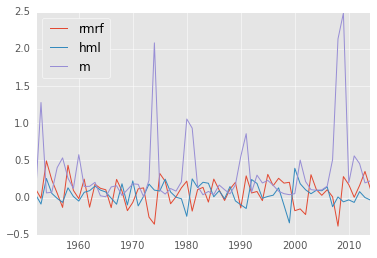

In [9]:
gmm_data[['rmrf', 'hml', 'm']].plot()
gmm_data.corr()

>**Answer: The correlation between m and returns is driven by 3 or 4 data points with huge spikes in m, and negative returns. **

#Homework: GMM Part II

####Question 1

We are going to continue our exploration of GMM in the consumption-based model,

$$E\left[\left(\frac{c_{t+1}}{c_t}\right)^{-\gamma}R^e_{t+1}\right]=0$$

I encourage you to submit your final answers to part I and read my explanations before continuing, as a way to make sure you're not on a wrong track.

Now, form the second-stage "efficient" GMM estimate,

$$min_\gamma g_T(\gamma)'S^{-1}g_T(\gamma)$$

Again, you have to search for $\gamma$. Report your estimate $\hat\gamma$ accurate to one decimal. To ponder: Why is it different from your first-stage estimate?


88.34


/usr/local/lib/python3.4/dist-packages/matplotlib-1.5.x-py3.4-linux-x86_64.egg/matplotlib/font_manager.py:1279: UserWarning: findfont: Font family ['monospace'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


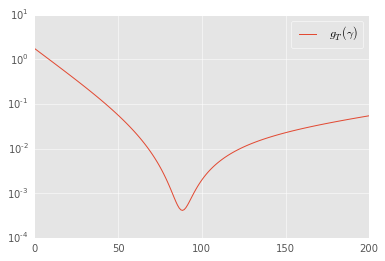

In [10]:
def obj_fun(gamma):
    return g_t(gamma).dot(np.linalg.pinv(S)).dot(g_t(gamma))


gamma_prime = opt.minimize(obj_fun, 80, tol=1e-8)
print ('{:.2f}'.format(*gamma_prime.x))

interval = np.linspace(0,200, num=200)
plt.plot(interval, [obj_fun(i) for i in interval], label = '$g_T(\gamma)$')
plt.yscale('log')
plt.legend(loc='best');

####Question 2

Using the d matrix evaluated at your new estimate,

$$d = \left. \frac{d g_T(\gamma)}{d \gamma} \right|_{\hat{\gamma}}$$

$$d=-E \left[ \log
\left( \frac{c_{t+1}}{c_{t}}\right) 
\left( \frac {c_{t+1}}{c_{t}} \right) ^{-\hat{\gamma}} R_{t+1}^{e} \right]$$


compute $a=d′S^{−1}$. (Recall the first order condition for the minimization is $d′S^{−1}gT_(\hat\gamma)=0$.)

Look at your $a=d′S^{−1}$ matrix. Is GMM paying different attention to the two moments than it was before? If so why has GMM changed its focus? 

In [11]:
d_prime = -np.c_[gmm_data.rmrf * np.log(gmm_data.dc) * (gmm_data.dc**-gamma_prime.x), 
                 gmm_data.hml  * np.log(gmm_data.dc) * (gmm_data.dc**-gamma_prime.x)].mean(0)

a = d_prime.dot(np.linalg.inv(S))

print ('{:.4f} {:.4f}'.format(*a/a.sum()))
print ('{:.2%} {:.2%}'.format(*np.diag(np.sqrt(S))))

0.2609 0.7391
17.63% 6.38%


>**GMM is paying more attention to the hml moment, because hml is less volatile so its $g_T$ is better measured**

####Question 3

Compute the second-stage standard error,

$$var(\hat\gamma)=\frac{1}{T}(d′S^{−1}d)^{−1}$$

Report the standard error (not variance) of your \gamma estimate. To ponder: efficient GMM is supposed to produce better estimates, by focusing more attention on better measured moments. Is your standard error lower than the first stage standard error? By a lot? 

In [12]:
var = 1 / (d_prime.dot(np.linalg.pinv(S)).dot(d_prime) * gmm_data.dc.shape[0])
se = np.sqrt(var)

print('{:.4f}'.format(se))

33.4126


####Question 4

Compute the variance of the moments $g_T(\hat b)$. As a reminder, the formula is

$$cov(g_T(\hat\gamma))=\frac{1}{T}(S−d(d′S^{−1}d)^{−1}d′)$$

Calculate $gT(\hat\gamma)$, $σ(gT(\hat\gamma))$ and compare to the first-stage values. 

In [13]:
d_S_inv_d = d_prime.dot(np.linalg.pinv(S)).dot(d_prime)
cov_g_hat_prime = (S - d_prime.dot(np.linalg.pinv(S)).dot(d_prime)) / gmm_data.dc.shape[0]


(S-(d_prime/d_S_inv_d).dot(d_prime)) / gmm_data.dc.shape[0]
cov_g_hat_prime

,rmrf,hml
rmrf,0.000493,-0.000102
hml,-0.000102,0.000064


>**Answer: The rmrf $g_T(\hat\gamma)$ is larger and the hml $g_T(\hat\gamma)$ is smaller, since GMM put more attention on the latter** 

####Question 5

Compute the "JT" test of overidentifying restrictions, which tells us whether the moments (pricing errors) are statistically significantly different from zero. Reminder,

$$TJ_T=Tg_T'S^{-1}g_T \sim \chi^2_1$$

The right hand side is the objective function from the second-stage minimization. Notes: There is one degree of freedom since we have two moments and set one linear combination to zero. in estimating $\gamma$

In [14]:
from scipy.stats import chi2
T_J_test = gmm_data.dc.shape[0] * g_t(gamma_prime.x).dot(np.linalg.pinv(S)).dot(g_t(gamma_prime.x))

print('test result: {:.4f} \nprobability: {:.4%}'.format(T_J_test, chi2.cdf(T_J_test,1)))

test result: 0.0259 
probability: 12.7808%


>**Answer: The JT test does not reject the hypothesis that the moments are zero **